# Trigger Trial
The purpose of this notebook is to investigate the measurement of signals generated by the ZVA VNA. A trigger signal is split and divided to provide the trigger for the high speed oscilloscope. The scope is currently monitoring port 1 output (signal under test) Channel2 port 3 (trigger before going through division) Channel3 and the trigger channel4. The trigger is divided by 256 and the Signal under test is at 255/256 * Frequency where Frequency is at 3 GHz. The scope is read every loop with a single frame, the data is fit using a sine wave with amplitude fixed and initial guesses provided by an earlier hand fit. Note the values in the time base column are potentially wrong (11.04) we should use the corrected timebase later. 

In [1]:
from pyMez import *
from pyMez.Code.Analysis.Fitting import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 0.597 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.162 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 2.625 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.014 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.158 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.01 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 0.725 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.026 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.02 s to import Code.Utils.Names
It took 4.341 s to import all of the active modules


In [140]:
scope_address="GPIB0::7"
zva_address="GPIB::20"
power_meter_address="GPIB::14"
data_directory=r"C:\Share\LongDurationLSNA\20180205_Very_Long_Phase Cal"
vna_setup={}
vna_setup["IFBW"]="10"
vna_setup["IFBW_Units"]="Hz"
vna_setup["Channel_Base_CW_Frequency"]="2.048"
vna_setup["Channel_Base_CW_Frequency_Units"]="GHz"
vna_setup["Trigger_Signal_Port"]="3"
vna_setup["Signal_Under_Test_Port"]="1"
vna_setup["Signal_Under_Freuquency"]=255
vna_setup["Trigger_Divide_By"]=8192
vna_setup["Power"]=-3
vna_setup["Power_Units"]="dBm"
scope_setup={}
scope_setup["SUT_Channel"]=2
scope_setup["Undivided_Trigger_Channel"]=3
scope_setup["Trigger_Channel"]=4

vna_setup["Notes"]="Large number of Frequency points  " 

In [3]:
zva=VNA(zva_address)

In [60]:
scope=HighSpeedOscope("GPIB0::7")

The information sheet was not found defaulting to address


In [4]:
Number_Measurements=1
Number_Frames=1

In [5]:
# single test 
test_data=scope.measure_waves(number_points=1000)
name=auto_name(directory=data_directory,extension="dat",specific_descriptor="Test_Data",
               general_descriptor="Highspeed_Oscilloscope")
test_data.path=os.path.join(data_directory,name)

In [6]:
print test_data

Time,CHAN1,CHAN2,CHAN3,CHAN4
29.5  12.471E-003  1.6613E-001  -5.028E-003  -2.2996E-001
29.5001  -1.354E-003  1.6798E-001  -1.8908E-002  -2.2971E-001
29.5002  -1.954E-003  2.0158E-001  -7.749E-003  -2.2946E-001
29.5003  5.22E-004  1.8392E-001  -1.4257E-002  -2.2971E-001
29.5004  -9.05E-004  1.6271E-001  -1.252E-003  -2.2920E-001
29.5005  1.721E-003  1.7672E-001  -8.647E-003  -2.2971E-001
29.5006  -1.204E-003  1.4725E-001  -1.6759E-002  -2.2971E-001
29.5007  -1.881E-003  1.3864E-001  -2.5689E-002  -2.2946E-001
29.5008  7.2E-005  1.4662E-001  -6.598E-003  -2.2946E-001
29.5009  5.94E-004  1.6955E-001  -2.372E-003  -2.2971E-001
29.501  -1.354E-003  1.5186E-001  -1.7624E-002  -2.2946E-001
29.5011  8.22E-004  1.7609E-001  -1.5189E-002  -2.2946E-001
29.5012  -3.05E-004  1.6301E-001  -7.588E-003  -2.2971E-001
29.5013  -2.254E-003  1.4662E-001  -1.7434E-002  -2.2920E-001
29.5014  6.72E-004  1.7890E-001  -2.0190E-002  -2.2946E-001
29.5015  -7.8E-005  1.6861E-001  -1.5893E-002  -2.2946E-001
29.501

In [7]:
scope.get_number_points()

1000

In [8]:
test_data.path

'C:\\Share\\LongDurationLSNA\\20180202_Trigger_Measurements\\Test_Data_Highspeed_Oscilloscope_20180202_001.dat'

In [22]:
zva.write("""SOURce:FREQuency{port}:CONVersion:ARBitrary:IFRequency {numerator},
{denominator}, {offset}, SWE""".format(**{"channel":1,
                                         "port":1,
                                         "numerator":868,
                                         "denominator":512,"offset":212*250*10**3}).replace("\n",""))

(74L, <StatusCode.success: 0>)

In [18]:
"""SOURce{channel}:FREQuency{port}:CONVersion:ARBitrary:IFRequency {numerator},
{denominator}, {offset}, CW""".format(**{"channel":1,"port":1,"numerator":868,"denominator":512,"offset":12*250*10**3})

'SOURce1:FREQuency1:CONVersion:ARBitrary:IFRequency 868,\n512, 3000000, CW'

In [26]:
zva.write("""SOURce:FREQuency{port}:CONVersion:ARBitrary:IFRequency {numerator},
{denominator}, {offset}, CW""".format(**{"channel":1,
                                         "port":1,
                                         "numerator":868,
                                         "denominator":512,"offset":10.00025*10**9}).replace("\n",""))

(78L, <StatusCode.success: 0>)

In [27]:
zva.query("SENS:SWE:POIN?")

u'60001\n'

In [34]:
N_points=[20,100,1000]

for point in N_points:
    start_time=datetime.datetime.utcnow()
    test_data=scope.measure_waves(number_points=point)
    name=auto_name(directory=data_directory,extension="dat",specific_descriptor="Test_Data",
                   general_descriptor="Highspeed_Oscilloscope")
    test_data.path=os.path.join(data_directory,name)
    stop_time=datetime.datetime.utcnow()
    diff=stop_time-start_time
    print("It took {0} s to acquire {1} points".format(diff.seconds,point ))

It took 0 s to acquire 20 points
It took 4 s to acquire 100 points
It took 366 s to acquire 1000 points


In [30]:
print("It took {0} s to acquire 1000 points".format(diff.seconds ))

It took 262 s to acquire 1000 points


In [33]:
scope.get_number_points()

16

In [22]:
N_points=[400]

for point in N_points:
    start_time=datetime.datetime.utcnow()
    test_data=scope.measure_waves(number_points=point)
    name=auto_name(directory=data_directory,extension="dat",specific_descriptor="Test_Data",
                   general_descriptor="Highspeed_Oscilloscope")
    test_data.path=os.path.join(data_directory,name)
    stop_time=datetime.datetime.utcnow()
    diff=stop_time-start_time
    print("It took {0} s to acquire {1} points".format(diff.seconds,point ))

It took 62 s to acquire 400 points


In [43]:
%matplotlib wx
plt.plot(test_data["CHAN2"])
plt.show()

In [44]:
%matplotlib wx
plt.plot(test_data["CHAN3"])
plt.show()

In [17]:

print number_points
print len(frequency_list)


21.0
21


In [18]:
for frequency in frequency_list:
    zva.write("""SOURce:FREQuency{port}:CONVersion:ARBitrary:IFRequency {numerator},
{denominator}, {offset}, SWE""".format(**{"channel":1,
                                         "port":1,
                                         "numerator":868,
                                         "denominator":512,"offset":frequency*10**9}).replace("\n",""))
    time.sleep(2)

In [6]:
help(time.sleep)

Help on built-in function sleep in module time:

sleep(...)
    sleep(seconds)
    
    Delay execution for a given number of seconds.  The argument may be
    a floating point number for subsecond precision.



In [23]:
float(zva.query("SENS:SWE:POIN?"))

60001.0

In [24]:
time_to_wait=float(zva.query("SENS:SWE:POIN?"))*1/float(zva.get_IFBW())

In [46]:
import time
from pyMez.Code.Utils.Names import *

In [136]:
len(frequency_list)*2./60.

13.4

In [141]:
start_frequency=3.475
stop_frequency=3.525
step=.00025
number_points=((stop_frequency-start_frequency)/step)+1
#number_points=21
#number_points=1
frequency_list=[start_frequency+step*i for i in range(int(number_points+1))]+[stop_frequency-step*i for i in range(int(number_points+1))]
#frequency_list=[2.111]
#frequency_list=[3.5 for i in range(int(number_points))]
time_to_wait=62*1.5 # time to leave the zva on in seconds
n_points=int(round(time_to_wait*float(zva.get_IFBW())))
# set the number of points to 1
zva.write('SWEEP:POINTS {0}'.format(n_points))
# set the trigger to single
zva.write("INITiate:CONTinuous OFF")

(25L, <StatusCode.success: 0>)

In [78]:
data_directory=r"C:\Share\LongDurationLSNA\20180205_Statistics_Phase"

In [142]:
wparameter_data = []
total_data=[]
for frequency_index,frequency in enumerate(frequency_list):
    # set the frequency
    zva.write("""SOURce:FREQuency{port}:CONVersion:ARBitrary:IFRequency {numerator},
{denominator}, {offset}, SWE""".format(**{"channel":1,
                                         "port":1,
                                         "numerator":868,
                                         "denominator":512,"offset":frequency*10**9}).replace("\n",""))
    # trigger the vna
    zva.write("ABORT;INITiate:IMMediate;*wai")
    start_oscope_time=datetime.datetime.utcnow()
    scope_measurement=scope.measure_waves(number_points=400)
    name_measurement=auto_name(directory=data_directory,extension="dat",specific_descriptor="Scan_SUT_Test",
               general_descriptor="Highspeed_Oscilloscope")
    
    scope_measurement.path=os.path.join(data_directory,name_measurement)
    scope_measurement.options["scope_settings"]=scope_setup
    scope_measurement.options["vna_settings"]=vna_setup
    scope_measurement.save_schema(change_extension(os.path.join(data_directory,name_measurement),new_extension="schema"))
    scope_measurement.save()
    stop_oscope_time=datetime.datetime.utcnow()
    time_oscope=stop_oscope_time-start_oscope_time
    time.sleep((time_to_wait-time_oscope.seconds))
    # Set the format to ascii and set up sweep definitions
    zva.write('FORM:ASC,0')
    # First get the A and Blists
    zva.write('CALC:PAR:SEL Trc1')
    zva.write('CALC:FORM MLIN')
    while zva.is_busy():
        time.sleep(.01)
    a_string = zva.query('CALC:DATA? SDATA')
    zva.write('CALC:PAR:SEL  Trc2')
    zva.write('CALC:FORM MLIN')
    while zva.is_busy():
        time.sleep(.01)
    b_string = zva.query('CALC:DATA? SDATA')
    # String Parsing
    a_list = a_string.replace("\n", "").split(",")
    b_list = b_string.replace("\n", "").split(",")
    # Construct a list of lists that is data in RI format
    re_a = a_list[0::2]
    im_a = a_list[1::2]
    re_b = b_list[0::2]
    im_b = b_list[1::2]
    for row_index,re_value in enumerate(re_a):
        new_row = [frequency / 10. ** 9,
                   re_a[row_index], im_a[row_index],
                   re_b[row_index], im_b[row_index]]
        #print(new_row)
        new_row = map(lambda x: float(x), new_row)
        new_total_row = [frequency / 10. ** 9,
               re_a[row_index], im_a[row_index],
               re_b[row_index], im_b[row_index]]
        new_total_row = map(lambda x: float(x), new_total_row)
        new_total_row=new_total_row+[datetime.datetime.utcnow()]
        wparameter_data.append(new_row)

        total_data.append(new_total_row)
    print("Measurement of {0} is finshed".format(frequency))

    
    

column_names = ["Frequency", "reA1_D1", "imA1_D1", "reB1_D1", "imB1_D1"]
total_column_names=["Frequency", "reA1_D1", "imA1_D1", "reB1_D1", "imB1_D1","Timestamp"]
# add some options here about auto saving
# do we want comment options?
w1_options = {"column_names_begin_token": "!", "data_delimiter": "  ", "column_names": column_names,
                   "data": wparameter_data, "specific_descriptor": "Wave_Parameters",
                   "general_descriptor": "One_Port", "extension": "w1p","directory":data_directory}

total_options = { "column_names": total_column_names,
                   "data": total_data, "specific_descriptor": "W1p_With_Timestamp",
                   "general_descriptor": "One_Port", "extension": "txt","directory":data_directory}
w1p = AsciiDataTable(None, **w1_options)

total=AsciiDataTable(None, **total_options) 

w1p.save()
w1p.save_schema(change_extension(w1p.path,new_extension=".schema"))

total.save()
total.save_schema(change_extension(total.path,new_extension=".schema"))            

Measurement of 3.475 is finshed
Measurement of 3.47525 is finshed
Measurement of 3.4755 is finshed
Measurement of 3.47575 is finshed
Measurement of 3.476 is finshed
Measurement of 3.47625 is finshed
Measurement of 3.4765 is finshed
Measurement of 3.47675 is finshed
Measurement of 3.477 is finshed
Measurement of 3.47725 is finshed
Measurement of 3.4775 is finshed
Measurement of 3.47775 is finshed
Measurement of 3.478 is finshed
Measurement of 3.47825 is finshed
Measurement of 3.4785 is finshed
Measurement of 3.47875 is finshed
Measurement of 3.479 is finshed
Measurement of 3.47925 is finshed
Measurement of 3.4795 is finshed
Measurement of 3.47975 is finshed
Measurement of 3.48 is finshed
Measurement of 3.48025 is finshed
Measurement of 3.4805 is finshed
Measurement of 3.48075 is finshed
Measurement of 3.481 is finshed
Measurement of 3.48125 is finshed
Measurement of 3.4815 is finshed
Measurement of 3.48175 is finshed
Measurement of 3.482 is finshed
Measurement of 3.48225 is finshed
Meas

Measurement of 3.4975 is finshed
Measurement of 3.49775 is finshed
Measurement of 3.498 is finshed
Measurement of 3.49825 is finshed
Measurement of 3.4985 is finshed
Measurement of 3.49875 is finshed
Measurement of 3.499 is finshed
Measurement of 3.49925 is finshed
Measurement of 3.4995 is finshed
Measurement of 3.49975 is finshed
Measurement of 3.5 is finshed
Measurement of 3.50025 is finshed
Measurement of 3.5005 is finshed
Measurement of 3.50075 is finshed
Measurement of 3.501 is finshed
Measurement of 3.50125 is finshed
Measurement of 3.5015 is finshed
Measurement of 3.50175 is finshed
Measurement of 3.502 is finshed
Measurement of 3.50225 is finshed
Measurement of 3.5025 is finshed

In [35]:
new_row

[3.5e-09,
 [u'0.131468313',
  u'0.1314436699',
  u'0.1313789836',
  u'0.1314043244',
  u'0.1314361289',
  u'0.1313973587',
  u'0.1313782613',
  u'0.1313598127',
  u'0.1313742826',
  u'0.1314097965',
  u'0.131363571',
  u'0.131395755',
  u'0.1314107636',
  u'0.1313817013',
  u'0.1313999173',
  u'0.1313750661',
  u'0.1313767433',
  u'0.1313870632',
  u'0.1314211938',
  u'0.1314030634',
  u'0.1314385528',
  u'0.1314249153',
  u'0.1314325788',
  u'0.1314391404',
  u'0.1313921192',
  u'0.1313987298',
  u'0.1314095149',
  u'0.1314124408',
  u'0.1313955714',
  u'0.1313791549',
  u'0.1313976158',
  u'0.1313940656',
  u'0.131401423',
  u'0.1313854963',
  u'0.1313506312',
  u'0.1313471178',
  u'0.1313592496',
  u'0.1313320112',
  u'0.1313492479',
  u'0.1313669252',
  u'0.1313487827',
  u'0.131327751',
  u'0.1313404215',
  u'0.1313264167',
  u'0.1313394788',
  u'0.1313755803',
  u'0.1313920947',
  u'0.1314001009',
  u'0.131370304',
  u'0.1313727769',
  u'0.1313367856',
  u'0.1313177127',
  u'0.13

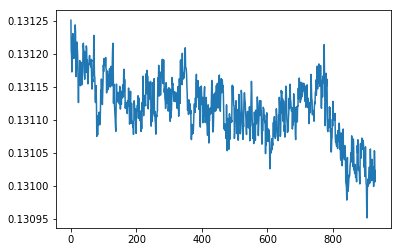

In [40]:
plt.plot(w1p["reA1_D1"])
#plt.plot(w1p["reB1_D1"])
plt.show()

TypeError: cannot perform reduce with flexible type

In [47]:
filename_increment(auto_name(directory=data_directory,extension="dat",specific_descriptor="Scan_SUT_Test",
               general_descriptor="Highspeed_Oscilloscope"))

'Scan_SUT_Test_Highspeed_Oscilloscope_20180202_002.dat'

In [45]:
help(auto_name)

Help on function auto_name in module pyMez.Code.Utils.Names:

auto_name(specific_descriptor=None, general_descriptor=None, directory=None, extension='xml', padding=3)
    Returns an automatically generated name for a file in a directory



In [52]:
name_measurement

'Scan_SUT_Test_Highspeed_Oscilloscope_20180202_002.dat'

In [159]:


# now we set the power in dB

zva.initialize_w1p()
zva.set_frequency(start=start_frequency*10**9,
                  stop=stop_frequency*10**9,
                  number_points=number_points+1,
                  type="LIN")
zva.set_IFBW(10)
zva.set_power(-3)
#short_w2p=zva.measure_w1p()


In [150]:
name=auto_name(directory=data_directory,extension="w1p",specific_descriptor="Term",
               general_descriptor="Sparameter_Cal")
short_w2p.path=os.path.join(data_directory,name)
short_w2p.save()

In [116]:
start_frequency=3.4975
stop_frequency=3.5025
step=.00025
number_points=((stop_frequency-start_frequency)/step)+1

In [117]:
frequency_list=[start_frequency+step*i for i in range(int(number_points+1))]

In [115]:
frequency_list

[3.4975, 3.49775]

In [22]:
len(short_w2p["Frequency"])

20

In [37]:
power_meter=NRPPowerMeter("GPIB::14")

In [38]:
 power_meter.get_state()

{'SENS:FUNC': u'"POW:AVG"', 'UNIT:POW': u'W'}

In [154]:
frequency_list

[3.475,
 3.47525,
 3.4755000000000003,
 3.47575,
 3.476,
 3.4762500000000003,
 3.4765,
 3.47675,
 3.477,
 3.47725,
 3.4775,
 3.47775,
 3.478,
 3.47825,
 3.4785,
 3.4787500000000002,
 3.479,
 3.47925,
 3.4795000000000003,
 3.47975,
 3.48,
 3.4802500000000003,
 3.4805,
 3.48075,
 3.481,
 3.48125,
 3.4815,
 3.48175,
 3.482,
 3.48225,
 3.4825,
 3.4827500000000002,
 3.483,
 3.48325,
 3.4835000000000003,
 3.48375,
 3.484,
 3.4842500000000003,
 3.4845,
 3.48475,
 3.485,
 3.48525,
 3.4855,
 3.48575,
 3.486,
 3.48625,
 3.4865,
 3.4867500000000002,
 3.487,
 3.48725,
 3.4875000000000003,
 3.48775,
 3.488,
 3.4882500000000003,
 3.4885,
 3.48875,
 3.489,
 3.48925,
 3.4895,
 3.48975,
 3.49,
 3.49025,
 3.4905,
 3.4907500000000002,
 3.491,
 3.49125,
 3.4915000000000003,
 3.49175,
 3.492,
 3.4922500000000003,
 3.4925,
 3.49275,
 3.493,
 3.49325,
 3.4935,
 3.49375,
 3.494,
 3.49425,
 3.4945,
 3.4947500000000002,
 3.495,
 3.49525,
 3.4955000000000003,
 3.49575,
 3.496,
 3.4962500000000003,
 3.4965,
 3.49

In [158]:
# select the sweep type 
zva.write('SWEEP:TYPE CW')
# set the number of points to 1
zva.write('SWEEP:POINTS 1')
# set the trigger to single
zva.write("INITiate:CONTinuous OFF")
port=1
measurement_delay=3
wparameter_data = []
power_data=[]
total_data=[]
for frequency in frequency_list:
    # set the frequency
    zva.write("SOUR:FREQ{0} {1}".format(port,frequency*10**9))
    power_meter.write("SENS:FREQ {0}".format(frequency*10**9))
    # trigger the vna
    zva.write("ABORT;INITiate:IMMediate;*wai")
    reading_delay=.2
    time.sleep(reading_delay)
    power_meter.write("INIT")
    time.sleep(reading_delay)
    power_meter_reading=float(power_meter.query("FETCh?").replace("\n", ""))
    time.sleep(measurement_delay)
    # Set the format to ascii and set up sweep definitions
    zva.write('FORM:ASC,0')
    # First get the A and Blists
    zva.write('CALC:PAR:SEL A{0}_D{0}'.format(port))
    zva.write('CALC:FORM MLIN')
    while zva.is_busy():
        time.sleep(.01)
    a_string = zva.query('CALC:DATA? SDATA')
    zva.write('CALC:PAR:SEL  B{0}_D{0}'.format(port))
    zva.write('CALC:FORM MLIN')
    while zva.is_busy():
        time.sleep(.01)
    b_string = zva.query('CALC:DATA? SDATA')
    # String Parsing
    a_list = a_string.replace("\n", "").split(",")
    b_list = b_string.replace("\n", "").split(",")
    # Construct a list of lists that is data in RI format
    re_a = a_list[0]
    im_a = a_list[1]
    re_b = b_list[0]
    im_b = b_list[1]
    new_row = [frequency / 10. ** 9,
               re_a, im_a,
               re_b, im_b]
    #print(new_row)
    new_row = map(lambda x: float(x), new_row)
    new_total_row = [frequency / 10. ** 9,power_meter_reading,
               re_a, im_a,
               re_b, im_b]
    new_total_row = map(lambda x: float(x), new_total_row)
    new_total_row=new_total_row+[datetime.datetime.utcnow()]
    wparameter_data.append(new_row)
    power_data.append([frequency / 10. ** 9,
               power_meter_reading])
    total_data.append(new_total_row)
    
column_names = ["Frequency", "reA1_D1", "imA1_D1", "reB1_D1", "imB1_D1"]
power_column_names=["Frequency","Power"]
total_column_names=["Frequency","Power", "reA1_D1", "imA1_D1", "reB1_D1", "imB1_D1","Date"]
# add some options here about auto saving
# do we want comment options?
w1_options = {"column_names_begin_token": "!", "data_delimiter": "  ", "column_names": column_names,
                   "data": wparameter_data, "specific_descriptor": "Wave_Parameters",
                   "general_descriptor": "One_Port", "extension": "w1p"}
power_options = {"column_names_begin_token": "!", "data_delimiter": "  ", "column_names": power_column_names,
                   "data": power_data, "specific_descriptor": "Power",
                   "general_descriptor": "One_Port", "extension": "txt"}
total_options = { "column_names": total_column_names,
                   "data": total_data, "specific_descriptor": "Power_Cal",
                   "general_descriptor": "One_Port", "extension": "txt"}
w1p = AsciiDataTable(None, **w1_options)
power=AsciiDataTable(None, **power_options) 
total=AsciiDataTable(None, **total_options) 
total_name=auto_name(directory=data_directory,extension="txt",specific_descriptor="Power_Meter_Reading",
               general_descriptor="Sparameter_Cal")
total.path=os.path.join(data_directory,total_name)
total.save()
w1p_name=auto_name(directory=data_directory,extension="w1p",specific_descriptor="Power_Meter_Reading",
               general_descriptor="Sparameter_Cal")
w1p.path=os.path.join(data_directory,w1p_name)
w1p.save()
power_name=auto_name(directory=data_directory,extension="power",specific_descriptor="Power_Meter_Reading",
               general_descriptor="Sparameter_Cal")
power.path=os.path.join(data_directory,power_name)
power.save()
              

In [152]:
total_name=auto_name(directory=data_directory,extension="txt",specific_descriptor="Power_Meter_Reading",
               general_descriptor="Sparameter_Cal")
total.path=os.path.join(data_directory,total_name)
total.save()
w1p_name=auto_name(directory=data_directory,extension="w1p",specific_descriptor="Power_Meter_Reading",
               general_descriptor="Sparameter_Cal")
w1p.path=os.path.join(data_directory,w1p_name)
w1p.save()
power_name=auto_name(directory=data_directory,extension="power",specific_descriptor="Power_Meter_Reading",
               general_descriptor="Sparameter_Cal")
power.path=os.path.join(data_directory,power_name)
power.save()

KeyboardInterrupt: 

In [50]:
zva.initialize_w1p()

In [51]:
zva.set_IFBW(10)

In [53]:
zva.set_frequency(start_frequency*10**9,stop_frequency*10**9,21)

In [54]:
zva.set_power(-3)

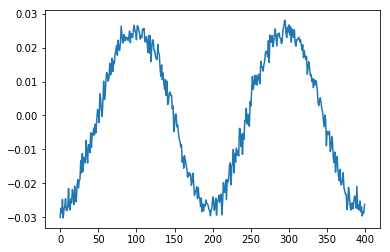

In [71]:
plt.plot(scope_measurement["CHAN3"])
plt.show()

In [168]:
zva.write('FORM:ASC,0')
# First get the A and Blists
zva.write('CALC:PAR:SEL Trc3')
zva.write('CALC:FORM MLIN')


(16L, <StatusCode.success: 0>)

In [169]:

power_string = zva.query('CALC:DATA? SDATA')

power is 364 +- 1 uw 

In [171]:
np.sqrt(364*10**(-6)*50)

0.13490737563232041

In [173]:
np_power_string=power_string.split(",")[0::2]

In [175]:
power_data_list=map(lambda x: float(x),np_power_string)

In [180]:
data=[]
for index,f in enumerate(linspace(start_frequency,stop_frequency,number_points+1)):
    data.append([f,power_data_list[index],power_data_list[index]**2*(1/50.)])
data_file=AsciiDataTable(None,data=data,column_names=["Frequency","Voltage","Power"])

In [181]:
print data_file

Frequency,Voltage,Power
3.475,0.1349522147,0.000364242005049
3.47525,0.1349147493,0.000364039791574
3.4755,0.1349244941,0.000364092382163
3.47575,0.1349285331,0.00036411418089
3.476,0.1349058614,0.000363991828802
3.47625,0.1349157632,0.000364045263197
3.4765,0.1349136114,0.00036403365082
3.47675,0.1349097553,0.000364012841502
3.477,0.1349242569,0.000364091102
3.47725,0.1349372309,0.000364161125659
3.4775,0.1348952468,0.000363934552185
3.47775,0.1348967948,0.000363942904946
3.478,0.1348984183,0.000363951665197
3.47825,0.1349088547,0.000364007981529
3.4785,0.1349196892,0.000364066450676
3.47875,0.1349187023,0.000364061124606
3.479,0.1349036609,0.000363979954484
3.47925,0.1349027494,0.000363975035914
3.4795,0.1349392152,0.000364171835976
3.47975,0.1348978196,0.000363948434657
3.48,0.1349195005,0.000364065432303
3.48025,0.1348944647,0.000363930332134
3.4805,0.1349123171,0.000364026666106
3.48075,0.1349162917,0.000364048115322
3.481,0.1349091729,0.000364009698651
3.48125,0.1348782823,0.0003

In [182]:
data_file.path=r"C:\Share\LongDurationLSNA\20180205_Very_Long_Phase Cal\Power_Cal_ZVA_PM.txt"
data_file.save()

In [184]:
np.std(map(lambda x:float(x),data_file["Power"]))

3.004269159193914e-07

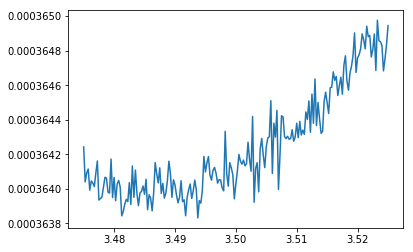

In [186]:
plt.plot(map(lambda x:float(x),data_file["Frequency"]),map(lambda x:float(x),data_file["Power"]))
plt.show()

In [265]:
meta=read_schema(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_011.schema")

In [266]:
meta["column_types"]=['float' for i in range(5)]

In [269]:
scope_data_1=AsciiDataTable(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_001.dat",**meta)

The index variable is 0
The element variable is header
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, Non

-0.0011818575
0.057091


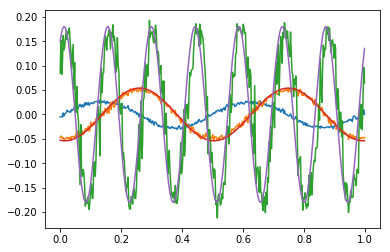

In [283]:
time=[10./400.*.1*i for i in range(len(scope_data_1["CHAN3"]))]
sine_wave=[.054*np.sin(2.*2.048*np.pi*t-np.pi/2-.2) for t in time]
sine_wave2=[.18*np.sin((3.4975*2.0)*2*np.pi*t-3*np.pi/2-.58) for t in time]
plt.plot(time,scope_data_1["CHAN3"])
plt.plot(time,scope_data_1["CHAN4"])
plt.plot(time,scope_data_1["CHAN2"])
plt.plot(time,sine_wave)
plt.plot(time,sine_wave2)
print np.mean(scope_data_1["CHAN4"])
print np.max(scope_data_1["CHAN4"])
plt.show()

In [203]:
trigger_frequency=2.048*10**9
3./trigger_frequency

1.46484375e-09

In [204]:
3./trigger_frequency/400

3.6621093750000005e-12

In [207]:
1/(1.5/trigger_frequency/400/(100*10**-12))

54.61333333333332

In [209]:
400/12*.1

3.3000000000000003

In [211]:
12./400.*.1

0.003

In [321]:
amp=(np.max(np.array(scope_data_1["CHAN4"]))-np.min(np.array(scope_data_1["CHAN4"])))/2
f=FunctionalModel(equation="a*sin(2*3.1415*2.048*x+phi)",variables="x",parameters="phi a")
f2=FunctionalModel(equation="a*sin(2*3.1415*2.048*{offset}*x+phi)".format(**{"offset":3.4975}),variables="x",parameters="phi a")

In [288]:
print f

0.054*sin(phi + 3.06787109375*x)


In [290]:
f(phi=.1,x=0)

0.00539100449892872

In [322]:
f.fit_data(time,scope_data_1["CHAN3"])
f2.fit_data(time,scope_data_1["CHAN2"])

In [324]:
print f.parameter_values
print f2.parameter_values

{'a': 0.0265287538834943, 'phi': -0.14458927458404278}
{'a': 0.16496948335943512, 'phi': 0.09816931116748921}


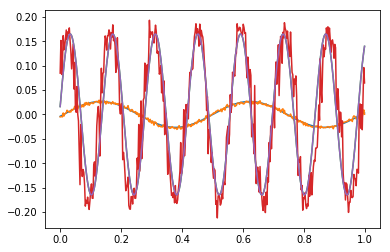

In [337]:
plt.plot(time,f(np.array(time)))
plt.plot(time,scope_data_1["CHAN3"])
plt.plot(time,f2(np.array(time)))
plt.plot(time,scope_data_1["CHAN2"])
plt.plot(time,abs(a1)*1.1969009339850114*np.sin(2*np.pi*2.048*3.4975*np.array(time)+cmath.phase(a1)-2.287581673495023))
plt.show()

In [325]:
a1=complex(-0.1002985144,0.09453814817)

In [327]:
import cmath

In [328]:
abs(a1)

0.13783052437780205

In [329]:
cmath.phase(a1)

2.3857509846625122

In [334]:
abs(cmath.rect(f2.parameter_values["a"],f2.parameter_values["phi"])/a1)

1.1969009339850114

In [335]:
cmath.phase(cmath.rect(f2.parameter_values["a"],f2.parameter_values["phi"])/a1)

-2.287581673495023

In [338]:
a1_2=complex(-0.07199408536,0.1180442192)

In [359]:

def read_and_fit(file_path,f_multiplier,f_base,a1_vna):
    """Reads in an oscope measurement and fits it, then compares that fit to a vna measurement"""
    schema=read_schema(change_extension(file_path,new_extension="schema"))
    schema["column_types"]=["float" for i in range(5)]
    scope_measurement=AsciiDataTable(file_path,**schema)
    I_fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(f_base),variables="x",parameters="phi a")
    Q_fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(f_base),variables="x",parameters="phi a")
    SUT_fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*{1}*x+phi)".format(f_base,f_multiplier),variables="x",parameters="phi a")
    n_points=len(scope_measurement.data)
    time_base=[10./n_points*.1*float(i) for i in range(n_points)]
    I_fit.fit_data(time_base,scope_measurement["CHAN3"])
    Q_fit.fit_data(time_base,scope_measurement["CHAN4"])
    SUT_fit.fit_data(time_base,scope_measurement["CHAN2"])
    # now the SUT fit and the a1_vna should have a constant phase difference 
    a1_scope=cmath.rect(SUT_fit.parameter_values["a"],SUT_fit.parameter_values["phi"])
    print("The a1 resulting from the fit of the scope data is {0}".format(a1_scope))
    print("The a1 from the vna is {0}".format(a1_vna))
    ratio=a1_scope/a1_vna
    print("The amplitude ratio is {0}".format(abs(ratio)))
    print("The phase difference is {0}".format(cmath.phase(ratio)))
    print("The amplitude of I is {0} and the phase of I is {1} ".format(I_fit.parameter_values["a"],I_fit.parameter_values["phi"]))
    print("The amplitude of Q is {0} and the phase of Q is {1} ".format(Q_fit.parameter_values["a"],Q_fit.parameter_values["phi"]))
    plt.plot(time_base,scope_measurement["CHAN2"],label="Data")
    plt.plot(time_base,SUT_fit(np.array(time_base)),label="Fit")
    plt.show()
    return [ratio,I_fit,Q_fit,SUT_fit,time_base,scope_measurement]

The index variable is 0
The element variable is header
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, Non

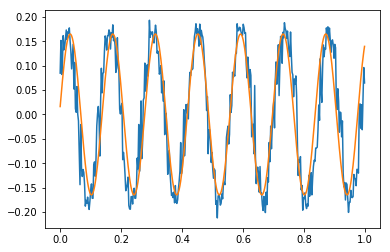

In [360]:
results=read_and_fit(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_001.dat",
                     3.4975,
                     2.048,
                     complex( -0.101547341,0.09315415811))

The index variable is 0
The element variable is header
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, Non

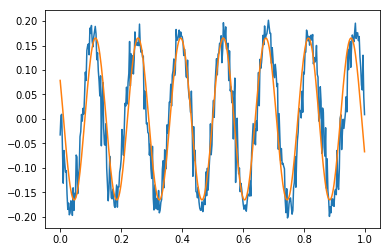

In [361]:
results2=read_and_fit(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_002.dat",
                     3.49775,
                     2.048,
                     complex(-0.07199408536 ,0.1180442192))

The index variable is 0
The element variable is header
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, Non

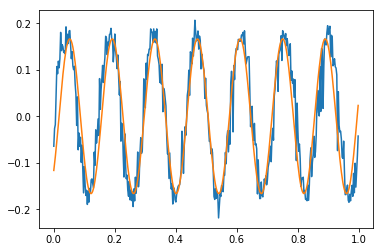

In [363]:
results3=read_and_fit(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_003.dat",
                     3.498,
                     2.048,
                     complex(-0.0383264502,0.1324326286))

The index variable is 0
The element variable is header
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, Non

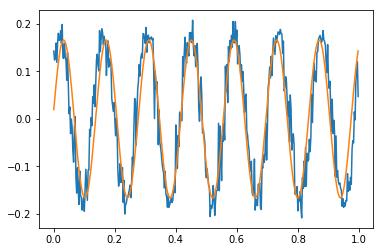

In [365]:
results4=read_and_fit(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_004.dat",
                     3.49825,
                     2.048,
                     complex(-0.002081265538,0.138691674))

In [366]:
w1p_schema=read_schema(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Wave_Parameters_One_Port_20180205_001.schema")
w1p_schema["column_types"]=["float" for i in range(5)]
w1p_1=AsciiDataTable(r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Wave_Parameters_One_Port_20180205_001.w1p",**w1p_schema)

In [367]:
from pyMez.Code.Analysis.SParameter import *

In [368]:
average_w1p=frequency_model_collapse_multiple_measurements(w1p_1)

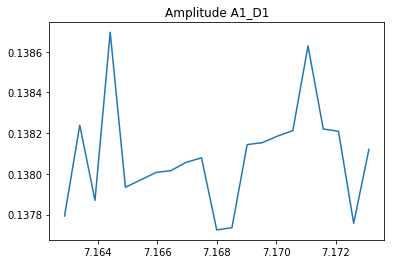

In [387]:
complex_data=[]
amplitudes=[]
phases=[]
frequency_list=[]
for index,row_data in enumerate(average_w1p.data):
    complex_number=complex(row_data[1],row_data[2])
    complex_data.append(complex_number)
    amplitudes.append(abs(complex_number))
    phases.append(cmath.phase(complex_number)*180/np.pi)
    frequency_list.append(row_data[0]*10**9*2.048)


plt.plot(frequency_list,amplitudes)
plt.title("Amplitude A1_D1")
plt.show()

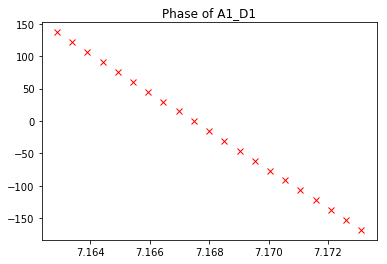

In [388]:
plt.plot(frequency_list,phases,'rx')
plt.title("Phase of A1_D1")
plt.show()

In [386]:
frequency_list

[7.16288,
 7.163392,
 7.1639040000000005,
 7.164416,
 7.164928,
 7.16544,
 7.165952000000001,
 7.166464,
 7.166976000000001,
 7.1674880000000005,
 7.168,
 7.168512000000001,
 7.169024,
 7.169536,
 7.1700479999999995,
 7.170560000000001,
 7.171072000000001,
 7.171584,
 7.172096000000001,
 7.172608,
 7.17312]

In [467]:
f_base=2.048
fit_data=[]
data_table_list=[]

for index,f in enumerate(frequency_list[:]):
    file_path=r"C:\Share\LongDurationLSNA\20180205_Phase_Cal_4\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_0{0:02d}.dat".format(index+1)
    a1_vna=cmath.rect(amplitudes[index],phases[index])
    schema=read_schema(change_extension(file_path,new_extension="schema"))
    schema["column_types"]=["float" for i in range(5)]
    scope_measurement=AsciiDataTable(file_path,**schema)
    data_table_list.append(scope_measurement)
    I_fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(f_base),variables="x",parameters="phi a")
    Q_fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(f_base),variables="x",parameters="phi a")
    SUT_fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(f),variables="x",parameters="phi a")
    n_points=len(scope_measurement.data)
    time_base=[10./n_points*.1*float(i) for i in range(n_points)]
    I_fit.fit_data(time_base,scope_measurement["CHAN3"])
    Q_fit.fit_data(time_base,scope_measurement["CHAN4"])
    SUT_fit.fit_data(time_base,scope_measurement["CHAN2"],initial_guess={"a":.175,"phi":0,"f":f_base*f})
    # now the SUT fit and the a1_vna should have a constant phase difference 
    a1_scope=cmath.rect(SUT_fit.parameter_values["a"],SUT_fit.parameter_values["phi"])
    print("The a1 resulting from the fit of the scope data is {0}".format(a1_scope))
    print("The a1 from the vna is {0}".format(a1_vna))
    ratio=a1_scope/a1_vna
    print("The amplitude ratio is {0}".format(abs(ratio)))
    print("The phase difference is {0}".format(cmath.phase(ratio)))
    print("The amplitude of I is {0} and the phase of I is {1} ".format(I_fit.parameter_values["a"],I_fit.parameter_values["phi"]))
    print("The amplitude of Q is {0} and the phase of Q is {1} ".format(Q_fit.parameter_values["a"],Q_fit.parameter_values["phi"]))
    fits=[SUT_fit,I_fit,Q_fit,]
    fit_data.append(map(lambda x:x.parameter_values,fits))
    plt.close()
    for index,channel in enumerate(["CHAN2","CHAN3","CHAN4"]):
        plt.plot(time_base,scope_measurement[channel],label="Data {0}".format(channel))
        plt.plot(time_base,fits[index](np.array(time_base)),label="Fit {0}".format(channel))
    plt.legend()
    plt.savefig(change_extension(file_path,new_extension="png"))

The index variable is 0
The element variable is header
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, None, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 1
The element variable is column_names
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 2
The element variable is data
The import_table variable is [[0, 0, None, None], [0, 1, None, None], [1, None, None, None]]
The index variable is 0
The element variable is header
The import_table variable is [[0, 0, Non

In [427]:
fit_data

[[{'a': 0.16496948156319996, 'phi': 0.09816992383832038},
  {'a': 0.0265287538834943, 'phi': -0.14458927458404278},
  {'a': -0.04992286194566494, 'phi': 1.3745795740889877}],
 [{'a': -0.16529466959837588, 'phi': -0.4962520254472506},
  {'a': 0.026410631128608548, 'phi': -0.15390085350300023},
  {'a': -0.04960369685900287, 'phi': 1.3883677845289215}],
 [{'a': 0.16650190056823258, 'phi': -0.7758483232980645},
  {'a': 0.02600447931046074, 'phi': -0.14919129990869814},
  {'a': -0.050132528471384746, 'phi': 1.38251117863123}],
 [{'a': 0.166233694639501, 'phi': 0.1196880494531545},
  {'a': 0.025978413856269696, 'phi': -0.14579086395667076},
  {'a': -0.04976370895585255, 'phi': 1.380961879490618}],
 [{'a': -0.16558528362302563, 'phi': 0.6169566874755518},
  {'a': 0.02631215690728465, 'phi': -0.14293895334357143},
  {'a': -0.04979961425962453, 'phi': 1.397400221896353}],
 [{'a': -0.16728341601113283, 'phi': -0.33594323322859165},
  {'a': 0.026354342818260067, 'phi': -0.13836129984568005},
  {'

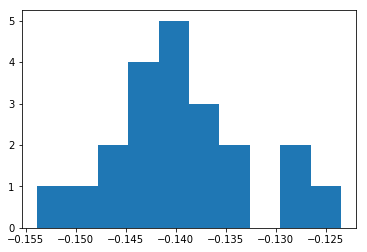

In [438]:
plt.close()
plt.hist(map(lambda x:x[1]['phi'],fit_data))
plt.show()

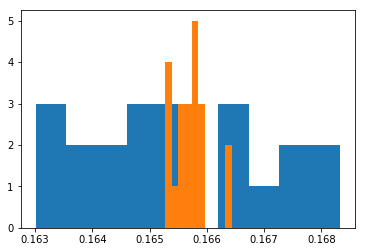

In [444]:
plt.close()
plt.hist(map(lambda x:abs(x[0]['a']),fit_data))
plt.hist(np.array(amplitudes)*1.2)
plt.show()

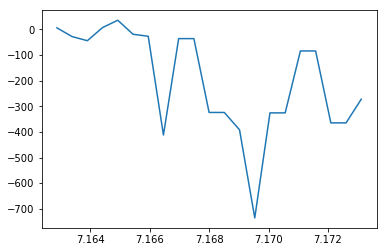

In [430]:
plt.close()
plt.plot(frequency_list[:len(fit_data)],unwrap_phase(map(lambda x:x[0]['phi']*180/np.pi,fit_data)))
plt.show()

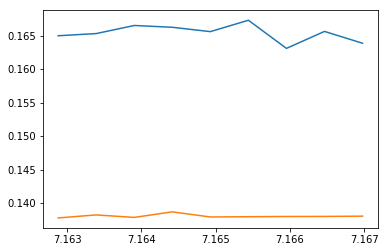

In [422]:
plt.close()
plt.plot(frequency_list[:len(fit_data)],map(lambda x:abs(x[0]['a']),fit_data))
plt.plot(frequency_list[:len(fit_data)],amplitudes[:len(fit_data)])
plt.show()

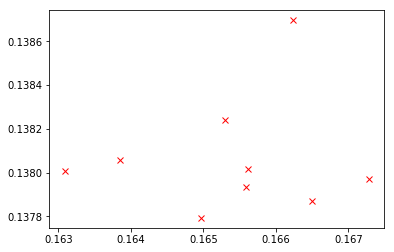

In [423]:
plt.close()

plt.plot(map(lambda x:abs(x[0]['a']),fit_data),amplitudes[:len(fit_data)],'rx')
plt.show()

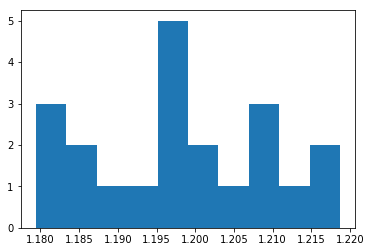

In [433]:
plt.close()

plt.hist(np.array(map(lambda x:abs(x[0]['a']),fit_data))/np.array(amplitudes[:len(fit_data)]))
plt.show()

In [435]:
print np.mean(np.array(map(lambda x:abs(x[0]['a']),fit_data))/np.array(amplitudes[:len(fit_data)]))
print np.std(np.array(map(lambda x:abs(x[0]['a']),fit_data))/np.array(amplitudes[:len(fit_data)]))

1.19773209811
0.0114597883979


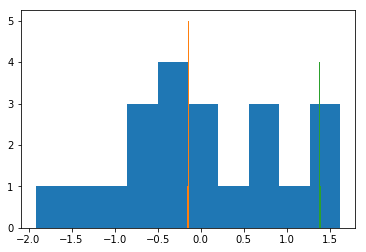

In [446]:
plt.close()
for i in range(3):
    plt.hist(map(lambda x:x[i]['phi'],fit_data))
plt.show()

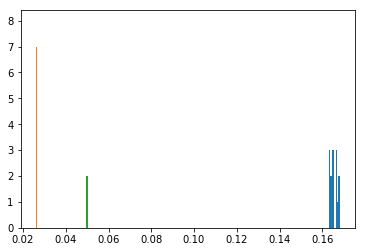

In [448]:
plt.close()
for i in range(3):
    plt.hist(map(lambda x:abs(x[i]['a']),fit_data))
plt.show()

In [451]:
in_schema=read_schema(r"C:\Share\LongDurationLSNA\TBD_TBC_Test_01\Scan_SUT_Test_Highspeed_Oscilloscope_20180205_DF_002.schema")

In [452]:
print in_schema

{'inline_comments': None, 'vna_settings': {'Trigger_Signal_Port': '3', 'Trigger_Divide_By': 8192, 'Power': -3, 'Signal_Under_Freuquency': 255, 'Notes': 'Fixed Trc1, trc2 issue retake of different frequencie data, 3.7GHZ ', 'IFBW': '10', 'Signal_Under_Test_Port': '1', 'Channel_Base_CW_Frequency_Units': 'GHz', 'Channel_Base_CW_Frequency': '2.111', 'IFBW_Units': 'Hz', 'Power_Units': 'dBm'}, 'data_begin_line': 1, 'column_names_begin_line': 0, 'footer_line_types': None, 'general_descriptor': 'Measurement', 'specific_descriptor': 'Scope', 'header_end_line': None, 'column_names_end_line': 1, 'data_table_element_separator': '\n', 'escape_character': None, 'inline_comment_begin': None, 'column_descriptions': None, 'inline_comment_end': None, 'data_list_dictionary': None, 'data_begin_token': None, 'comment_end': None, 'header_begin_line': None, 'row_end_token': None, 'block_comment_begin': None, 'column_units': None, 'metadata': None, 'header_end_token': None, 'comment_begin': None, 'empty_value

Frequency Mod F_Base/8192 = 3.4975


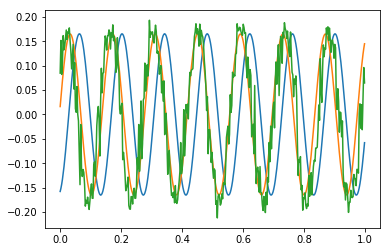

Frequency Mod F_Base/8192 = 3.49775


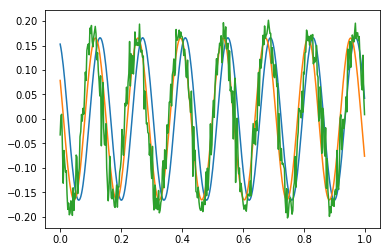

Frequency Mod F_Base/8192 = 3.498


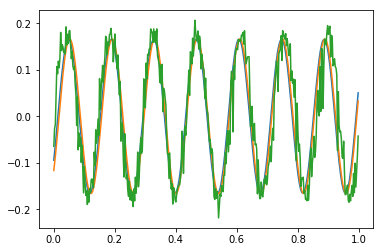

Frequency Mod F_Base/8192 = 3.49825


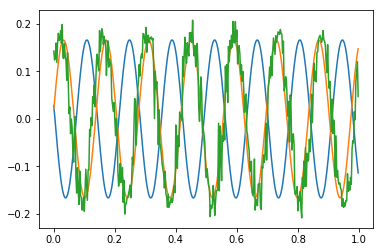

Frequency Mod F_Base/8192 = 3.4985


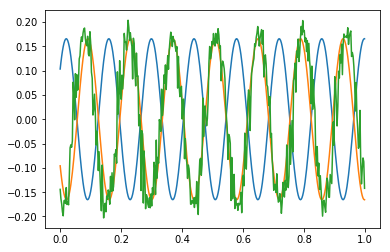

Frequency Mod F_Base/8192 = 3.49875


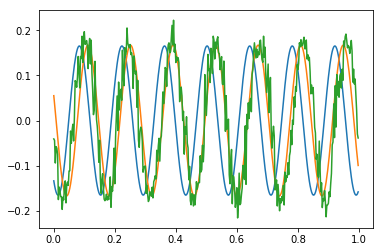

Frequency Mod F_Base/8192 = 3.499


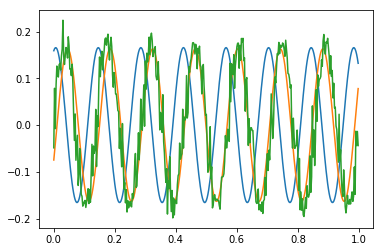

Frequency Mod F_Base/8192 = 3.49925


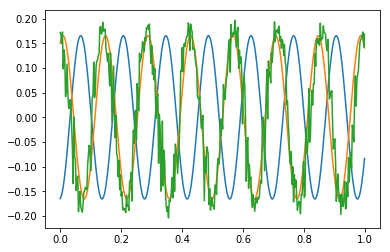

Frequency Mod F_Base/8192 = 3.4995


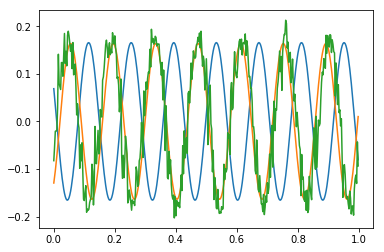

Frequency Mod F_Base/8192 = 3.49975


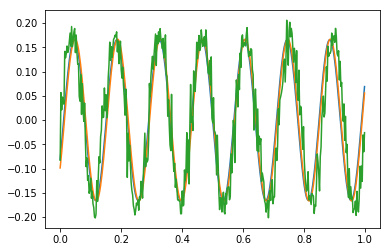

Frequency Mod F_Base/8192 = 3.5


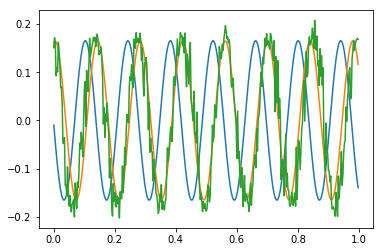

Frequency Mod F_Base/8192 = 3.50025


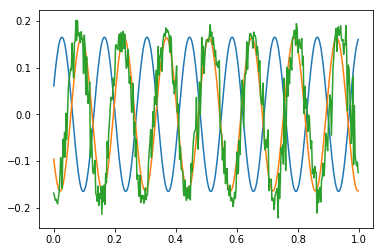

Frequency Mod F_Base/8192 = 3.5005


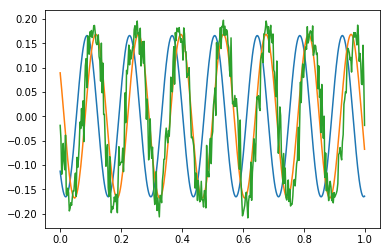

Frequency Mod F_Base/8192 = 3.50075


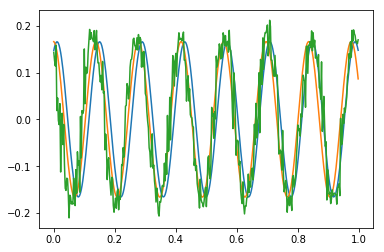

Frequency Mod F_Base/8192 = 3.501


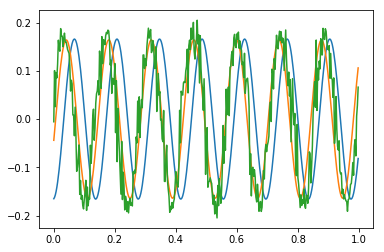

Frequency Mod F_Base/8192 = 3.50125


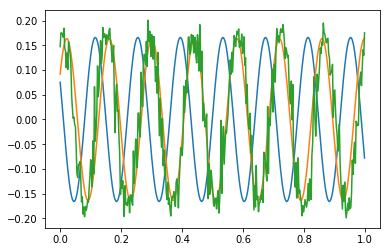

Frequency Mod F_Base/8192 = 3.5015


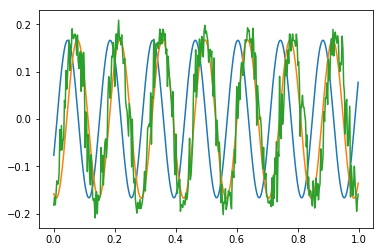

Frequency Mod F_Base/8192 = 3.50175


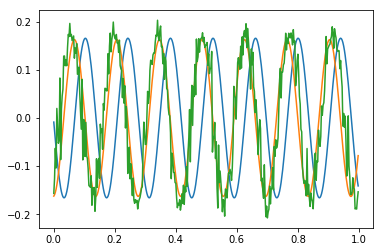

Frequency Mod F_Base/8192 = 3.502


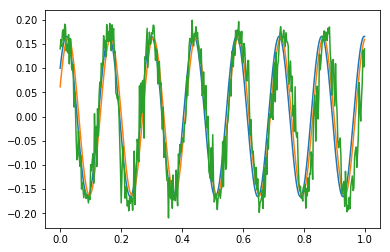

Frequency Mod F_Base/8192 = 3.50225


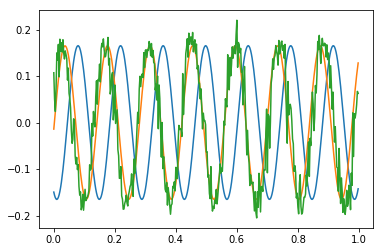

Frequency Mod F_Base/8192 = 3.5025


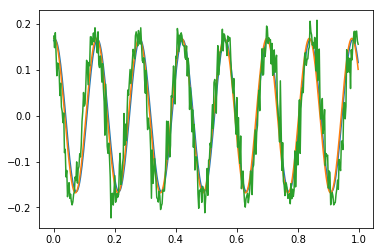

In [471]:
plt.close()
for index,f in enumerate(frequency_list[:]):
    plt.plot(time_base,1.2*np.array(amplitudes[index])*np.sin(2*np.pi*f*np.array(time_base)+np.array(phases[index])))
    SUT_fit.set_parameters(fit_data[index][0])
    plt.plot(time_base,SUT_fit(np.array(time_base)))
    plt.plot(time_base,data_table_list[index]["CHAN2"])
    print("Frequency Mod F_Base/8192 = {0}".format(f/(2.048)))
    plt.show()
    

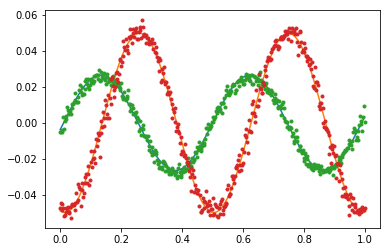

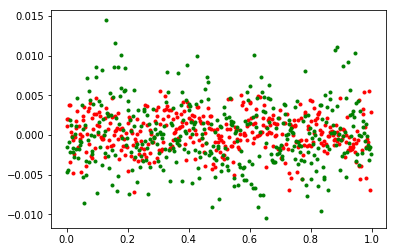

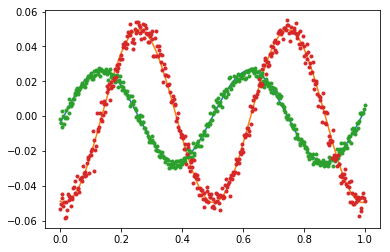

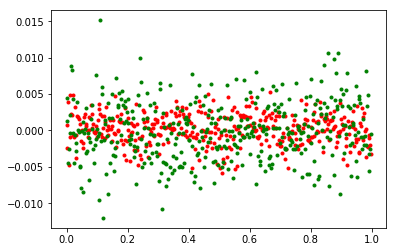

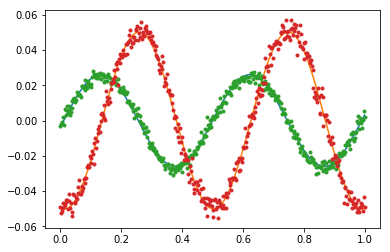

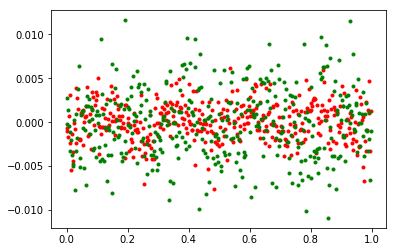

In [483]:
plt.close()
for index,f in enumerate(frequency_list[:3]):
    #plt.plot(time_base,1.2*np.array(amplitudes[index])*np.sin(2*np.pi*f*np.array(time_base)+np.array(phases[index])))
    I_fit.set_parameters(fit_data[index][1])
    Q_fit.set_parameters(fit_data[index][2])
    plt.plot(time_base,I_fit(np.array(time_base)))
    plt.plot(time_base,Q_fit(np.array(time_base)))
    plt.plot(time_base,data_table_list[index]["CHAN3"],".")
    plt.plot(time_base,data_table_list[index]["CHAN4"],".")
    plt.show()
    plt.close()
    difference_I=I_fit(np.array(time_base))-np.array(data_table_list[index]["CHAN3"])
    difference_Q=Q_fit(np.array(time_base))-np.array(data_table_list[index]["CHAN4"])
    plt.plot(time_base,difference_I,"r.")
    plt.plot(time_base,difference_Q,"g.")
    plt.show()


In [485]:
sub=I_fit.parameter_values.copy()
sub["f_base"]=f_base
Time_Base_error_fit=FunctionalModel(equation="{a}*sin(2*3.1415*{f_base}*(t+err)+{phi})".format(**sub),variables="t",parameters="err")

In [486]:
print Time_Base_error_fit

0.0260044793105*sin(12.867584*err + 12.867584*t - 0.149191299909)


In [487]:
time_point_index=0
time_base_data_x=[time_base[time_point_index] for x in data_table_list]
time_base_data_y=[x["CHAN3"][time_point_index] for x in data_table_list]

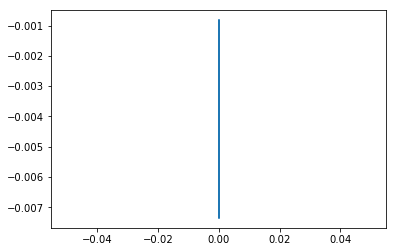

In [488]:
plt.plot(time_base_data_x,time_base_data_y)
plt.show()

In [489]:
time_base_data_y

[-0.004883,
 -0.001584,
 -0.003169,
 -0.000823,
 -0.00577,
 -0.002917,
 -0.004883,
 -0.006087,
 -0.006913,
 -0.007355,
 -0.006406,
 -0.002217,
 -0.001836,
 -0.002346,
 -0.005644,
 -0.003614,
 -0.005961,
 -0.002281,
 -0.001965,
 -0.003805,
 -0.002788]

In [490]:
Time_Base_error_fit.fit_data(time_base_data_x,time_base_data_y)

In [491]:
Time_Base_error_fit.parameter_values

{'err': -0.0002989014140939157}

In [521]:
sub_I=I_fit.parameter_values.copy()
sub_I["f_base"]=f_base
Time_Base_error_fit=FunctionalModel(equation="{a}*sin(2*3.1415*{f_base}*(t+err)+{phi})".format(**sub_I),
                                    variables="t",parameters="err")
time_base_correction_I=[]
for time_point_index,t in enumerate(time_base):

    time_base_data_x=[time_base[time_point_index] for x in data_table_list]
    time_base_data_y=[x["CHAN3"][time_point_index] for x in data_table_list]
    Time_Base_error_fit.fit_data(time_base_data_x,time_base_data_y)
    time_base_correction_I.append(Time_Base_error_fit.parameter_values["err"])
sub_Q=Q_fit.parameter_values.copy()
sub_Q["f_base"]=f_base
new_Q={}
for key,value in sub_Q.iteritems():
    new_Q[key+"_Q"]=value
new_Q.update(sub_I)
Time_Base_error_fit=FunctionalModel(equation="{a}*sin(2*3.1415*{f_base}*(t+err)+{phi})".format(**sub_Q),
                                    variables="t",parameters="err")
time_base_correction_Q=[]
for time_point_index,t in enumerate(time_base):

    time_base_data_x=[time_base[time_point_index] for x in data_table_list]
    time_base_data_y=[x["CHAN4"][time_point_index] for x in data_table_list]
    Time_Base_error_fit.fit_data(time_base_data_x,time_base_data_y)
    time_base_correction_Q.append(Time_Base_error_fit.parameter_values["err"])
# now I try it at the same time
Time_Base_error_fit=FunctionalModel(equation="{a}*sin(2*3.1415*{f_base}*(t+err)+{phi})+{a_Q}*sin(2*3.1415*{f_base_Q}*(t+err)+{phi_Q})".format(**new_Q),
                                    variables="t",parameters="err")
time_base_correction_IQ=[]
for time_point_index,t in enumerate(time_base):
    
    time_base_data_x=[time_base[time_point_index] for x in data_table_list]
    time_base_data_y=[x["CHAN4"][time_point_index]+x["CHAN3"][time_point_index]for x in data_table_list]
    Time_Base_error_fit.fit_data(time_base_data_x,time_base_data_y)
    time_base_correction_IQ.append(Time_Base_error_fit.parameter_values["err"])

In [530]:
time_base_correction=time_base_correction_Q

In [529]:
time_base_correction_Q

[-0.002820417024852221,
 -0.0048078399923991415,
 -0.007607322976277711,
 -0.014440338324328941,
 -0.011363717066262005,
 -0.017329425742059645,
 0.016481494363516258,
 0.011656934731252837,
 0.013849892306654125,
 0.010810168538560618,
 0.01294494618356921,
 0.0057825474946310365,
 0.012084210713811008,
 0.007178479218651948,
 0.008811712026637976,
 -0.0019616780944471525,
 0.006255468084744093,
 0.007532148942440724,
 0.00776116173435692,
 0.0065849599618478015,
 0.003190564166612377,
 0.0030585273569969295,
 0.008983555150820674,
 0.007729640231169843,
 0.005641981078731037,
 0.003159639393580549,
 0.002796001182228137,
 0.002689653853250044,
 0.0006956237157190442,
 0.0026119916409752834,
 0.0030822512555490015,
 0.0028158259838521565,
 0.001776657289540104,
 -0.0009106939907471579,
 0.0014856069827084515,
 0.0011448967820784648,
 0.004215281994504667,
 0.0003216523833560199,
 -3.877691565500426e-05,
 -0.000279708478762523,
 0.0013905039770982686,
 0.00373442033470558,
 0.000331979

In [555]:
corrected_time_base=tbc["tbc"]

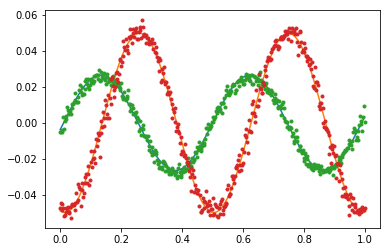

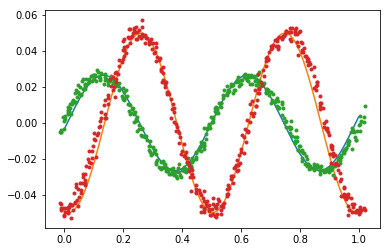

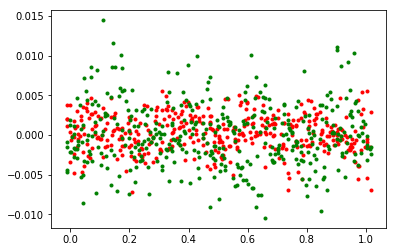

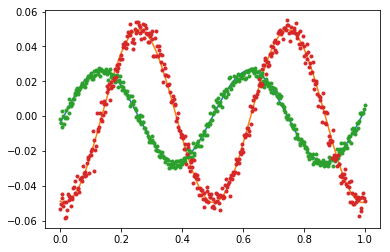

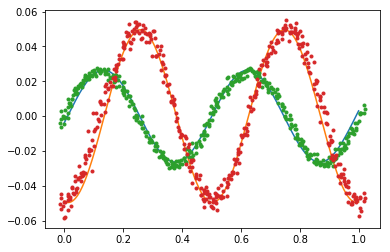

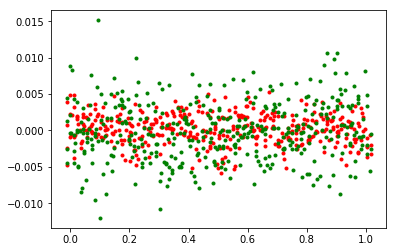

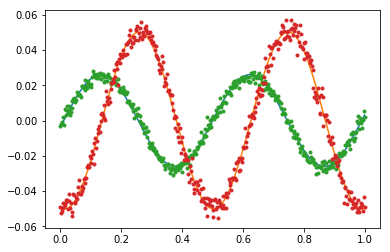

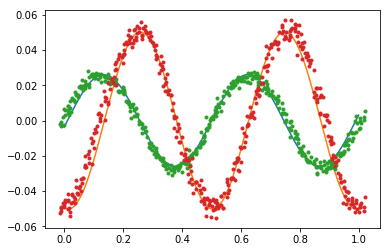

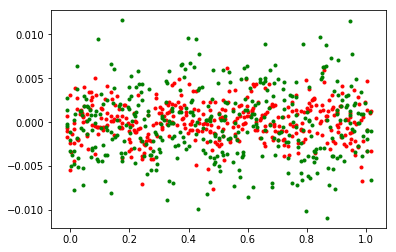

In [556]:
plt.close()
for index,f in enumerate(frequency_list[:3]):
    #plt.plot(time_base,1.2*np.array(amplitudes[index])*np.sin(2*np.pi*f*np.array(time_base)+np.array(phases[index])))
    I_fit.set_parameters(fit_data[index][1])
    Q_fit.set_parameters(fit_data[index][2])
    plt.plot(time_base,I_fit(np.array(time_base)))
    plt.plot(time_base,Q_fit(np.array(time_base)))
    plt.plot(time_base,data_table_list[index]["CHAN3"],".")
    plt.plot(time_base,data_table_list[index]["CHAN4"],".")
    plt.show()
    I_fit.set_parameters(fit_data[index][1])
    Q_fit.set_parameters(fit_data[index][2])
    plt.plot(time_base,I_fit(np.array(time_base)))
    plt.plot(time_base,Q_fit(np.array(time_base)))
    plt.plot(corrected_time_base,data_table_list[index]["CHAN3"],".")
    plt.plot(corrected_time_base,data_table_list[index]["CHAN4"],".")
    plt.show()
    plt.close()
    difference_I=I_fit(np.array(time_base))-np.array(data_table_list[index]["CHAN3"])
    difference_Q=Q_fit(np.array(time_base))-np.array(data_table_list[index]["CHAN4"])
    plt.plot(corrected_time_base,difference_I,"r.")
    plt.plot(corrected_time_base,difference_Q,"g.")
    plt.show()


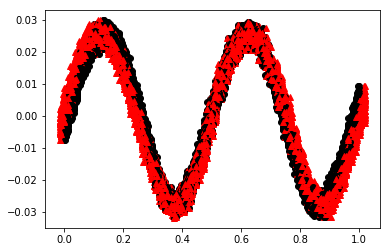

In [558]:
for index,data_table in enumerate(data_table_list):
    plt.plot(time_base,data_table["CHAN3"],'ko')
    plt.plot(corrected_time_base,data_table["CHAN3"],'r^')
plt.show()

In [519]:
{"!":1}+{"w":2}

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

{'a': 0.16432459093914487, 'phi': 2.6148382599941686}
{'a': 0.11684255110752945, 'phi': 2.609363993166516}


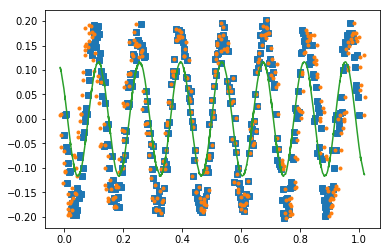

In [574]:
index=1
plt.plot(time_base,data_table_list[index]["CHAN2"],"s")
plt.plot(corrected_time_base,data_table_list[index]["CHAN2"],".")

SUT_fit.fit_data(time_base,data_table_list[index]["CHAN2"],initial_guess={"a":.2,"phi":3.14})
print SUT_fit.parameter_values
SUT_fit.fit_data(corrected_time_base,data_table_list[index]["CHAN2"],initial_guess={"a":.164,"phi":2.6})
print SUT_fit.parameter_values
plt.plot(corrected_time_base,SUT_fit(np.array(corrected_time_base)))
plt.show()


In [551]:
tbc=pandas.read_csv(r"C:\Share\TBC Test Files\Testing3\Test_LSNA\scope_1.nut",header=None,names=["tbc"])

In [552]:
tbc

,tbc
0,-0.010335
1,-0.013181
2,-0.011330
3,-0.010058
4,-0.001956
5,-0.001760
6,-0.000641
7,0.004190
8,0.002697
9,0.012112


In [548]:
10./400.

0.025

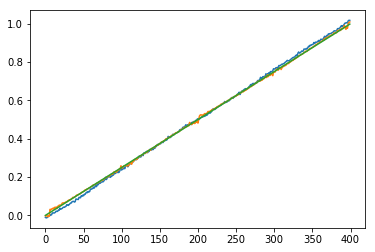

In [554]:
plt.plot(tbc["tbc"])
plt.plot(corrected_time_base)
plt.plot(time_base)
plt.show()

In [ ]:
tbc_time_base=[]